In [1]:
import pandas as pd

In [2]:
resenha = pd.read_csv("../Dataset/imdb/imdb-pt-br.csv")

In [3]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
treino, teste, classe_treino, classe_test =  train_test_split(resenha.text_pt,resenha.sentiment,random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
regressao_logistica = LogisticRegression()

In [8]:
## regressao_logistica.fit(treino, classe_treino)

In [9]:
print(resenha.text_pt[189])

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [10]:
print(resenha.text_pt[49002])

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior que você 

In [11]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [12]:
classificacao = resenha["sentiment"].replace(["neg","pos"],[0,1])

In [13]:
resenha["classificacao"] =  classificacao

In [14]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [15]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [16]:
resenha.text_pt[49458]

'O drama romântico da classe trabalhadora do diretor Martin Ritt é tão inacreditável quanto eles são, mas há momentos de prazer devido principalmente ao carisma das estrelas Jane Fonda e Robert De Niro, ambos ótimos. Ela é uma viúva que não pode seguir em frente, é analfabeta e é uma inventora de armários - provavelmente você pode adivinhar o resto. Adaptação do romance de Pat Barkers "Union Street" um título melhor! é tão descontraído que beirar sem graça, e a edição de filmes é uma bagunça, mas ainda é agradável; uma fantasia de colarinho azul em tons rosados. Não há aberturas para questões sérias, mesmo o ângulo do analfabetismo é apenas uma ferramenta de enredo para a história de amor que se segue e não há fogos de artifício reais, embora os personagens sejam intencionalmente um pouco incolores e as derivações reduzidas a um nível interessante. O final é puro fluff - e os cínicos acharão difícil de engolir - embora esses dois personagens mereçam um final feliz e a foto não seria re

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vetorizar = CountVectorizer(lowercase=False)
texto = ["Assisti um filme bom","Assisti um filme ruim"]
bow = vetorizar.fit_transform(texto)
vetorizar.get_feature_names()

['Assisti', 'bom', 'filme', 'ruim', 'um']

In [19]:
matriz_esparsa =  pd.SparseDataFrame(bow,columns=vetorizar.get_feature_names())
matriz_esparsa

/home/vanitas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  """Entry point for launching an IPython kernel.
/home/vanitas/.local/lib/python3.6/site-packages/pandas/core/sparse/frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
/home/vanitas/.local/lib/python3.6/site-packages/pandas/core/frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArra

,Assisti,bom,filme,ruim,um
0,1,1.0,1,NaN,1
1,1,NaN,1,1.0,1


In [20]:
vetorizar = CountVectorizer(lowercase=False,max_features=50)
bow = vetorizar.fit_transform(resenha.text_pt)
print(bow.shape)

(49459, 50)


In [21]:
treino, teste, classe_treino, classe_test =  train_test_split(bow,resenha.classificacao,random_state=42)
regressao_logistica = LogisticRegression(solver='lbfgs')
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste,classe_test)
print(acuracia)

0.6583097452486858


In [22]:
def classificar_texto(texto,coluna_texto,coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False,max_features=50)
    bow = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_test =  train_test_split(bow,texto[coluna_classificacao],random_state=42)
    regressao_logistica = LogisticRegression(solver='lbfgs')
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste,classe_test)

In [23]:
print(classificar_texto(resenha,"text_pt","classificacao"))

0.6583097452486858


In [24]:
%matplotlib inline 

In [25]:
from wordcloud import WordCloud

In [26]:
todas_palavras = ''.join([texto for texto in resenha.text_pt])
nuvem_palavras = WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(todas_palavras)

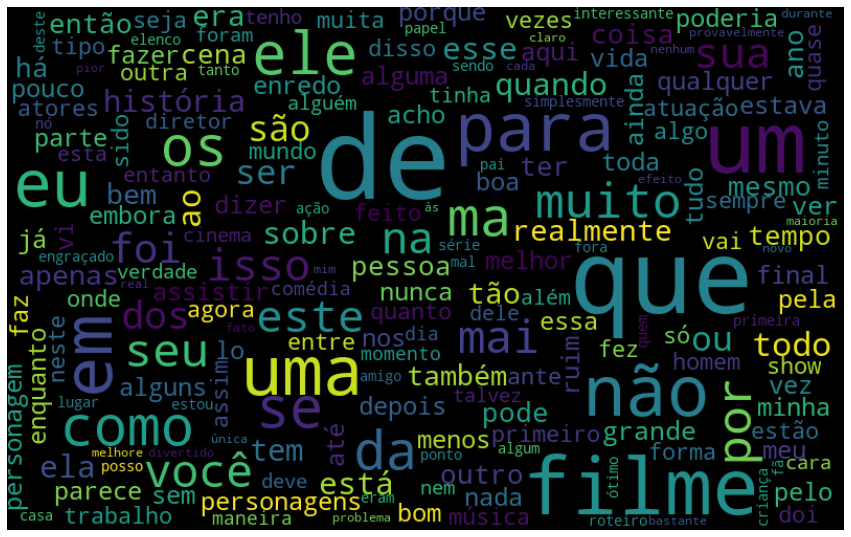

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
plt.imshow(nuvem_palavras,interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
def generate_img(dataframe,target,column_target):
    result = dataframe.query("sentiment == '{}'".format(target))
    todas_palavras = ''.join([texto for texto in result[column_target]])
    nuvem_palavras = WordCloud(width=800,height=500,max_font_size=110,collocations=False,background_color="White").generate(todas_palavras)
    plt.figure(figsize=(15,12))
    plt.imshow(nuvem_palavras,interpolation='bilinear')
    plt.axis("off")
    plt.show()

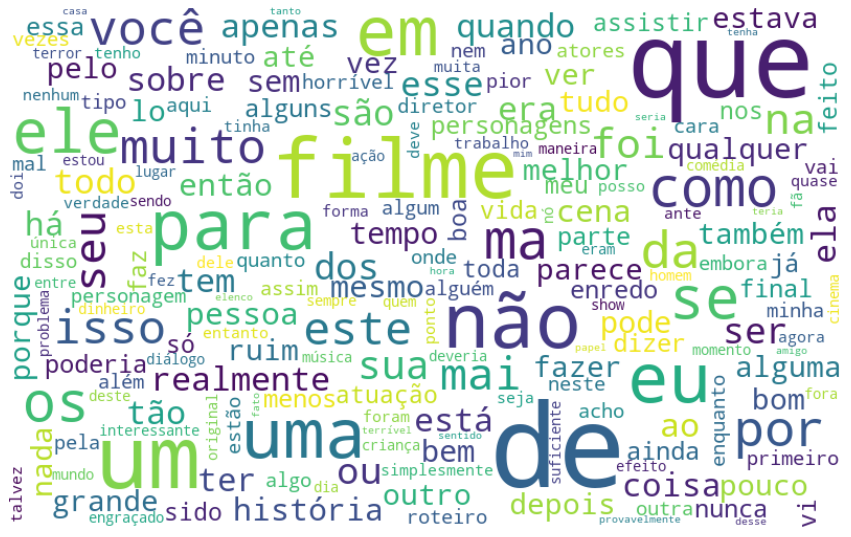

In [29]:
generate_img(resenha,'neg','text_pt')

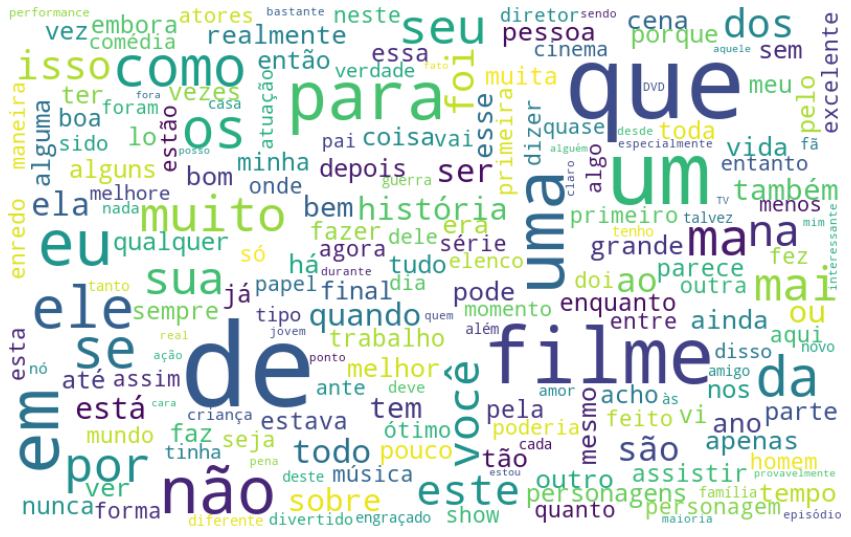

In [30]:
generate_img(resenha,'pos','text_pt')

In [31]:
import nltk
from nltk import tokenize

In [32]:
__token = tokenize.WhitespaceTokenizer()

In [33]:
phrase_tokenized = __token.tokenize(todas_palavras)

In [34]:
frequency = nltk.FreqDist(phrase_tokenized)

In [35]:
frequency

FreqDist({'de': 417383, 'que': 325058, 'e': 299720, 'o': 244836, 'um': 216380, 'a': 210154, 'é': 192359, 'em': 132770, 'uma': 130883, 'não': 127894, ...})

In [36]:
## DataFrame 
frequency_df =  pd.DataFrame({"Palavra":list(frequency.keys()),"Frequencia":list(frequency.values())})
frequency_df.nlargest(columns="Frequencia",n=10)

,Palavra,Frequencia
20,de,417383
14,que,325058
42,e,299720
3,o,244836
7,um,216380
102,a,210154
45,é,192359
199,em,132770
1,uma,130883
29,não,127894


In [37]:
import seaborn as sns

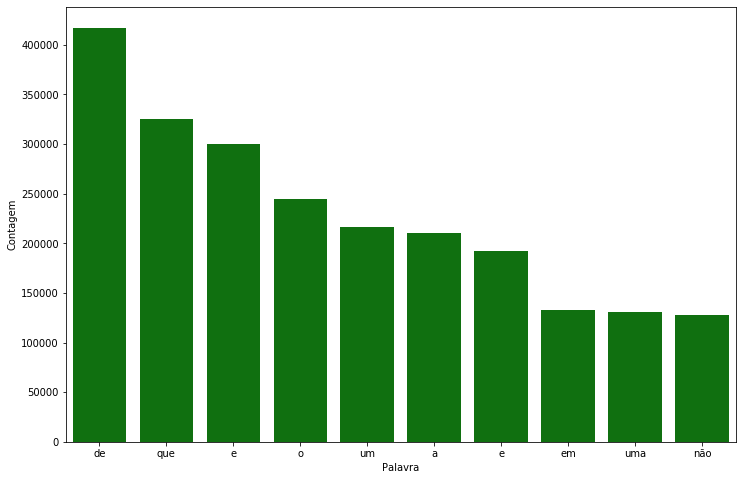

In [38]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=frequency_df.nlargest(columns="Frequencia",n=10),x="Palavra",y="Frequencia",color="Green")
ax.set(ylabel="Contagem")
plt.show()

In [39]:
def pareto(text_collection,column_target,amount,plot_color):
    all_words =  ''.join([texto for texto in text_collection[column_target]])
    __tokens = __token.tokenize(all_words)
    __frequency = nltk.FreqDist(__tokens)
    __df_frequency =  pd.DataFrame({"Word":list(__frequency.keys()),"Frequency":list(__frequency.values()),})
    __df_frequency =  __df_frequency.nlargest(columns="Frequency",n=amount)
    plt.figure(figsize=(12,8))
    __ax = sns.barplot(data=__df_frequency,x="Word",y="Frequency",color=plot_color)
    __ax.set(ylabel="Count")
    plt.show()

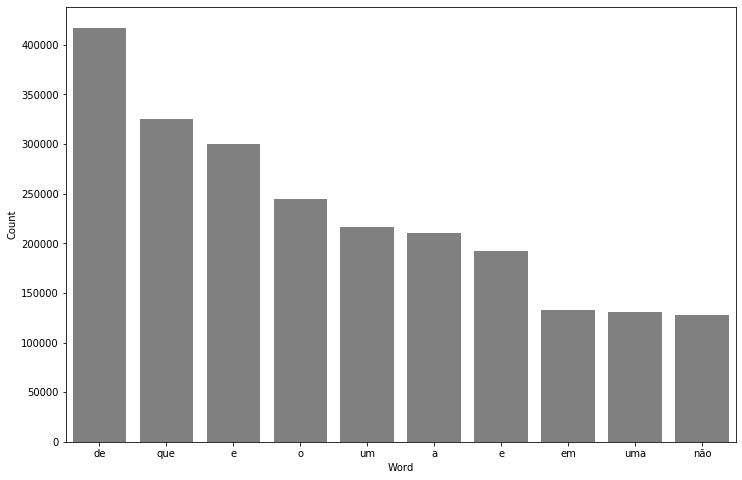

In [40]:
pareto(resenha,"text_pt",10,"gray")

In [41]:
palavras_irrelevantas = nltk.corpus.stopwords.words("portuguese")

In [42]:
frase_processada = list()

In [43]:
for texto in resenha.text_pt:
    nova_frase = list()
    palavras_texto = __token.tokenize(texto)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantas:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_1"] = frase_processada

In [44]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [45]:
classificar_texto(resenha,"tratamento_1","classificacao")

0.6607359482410028

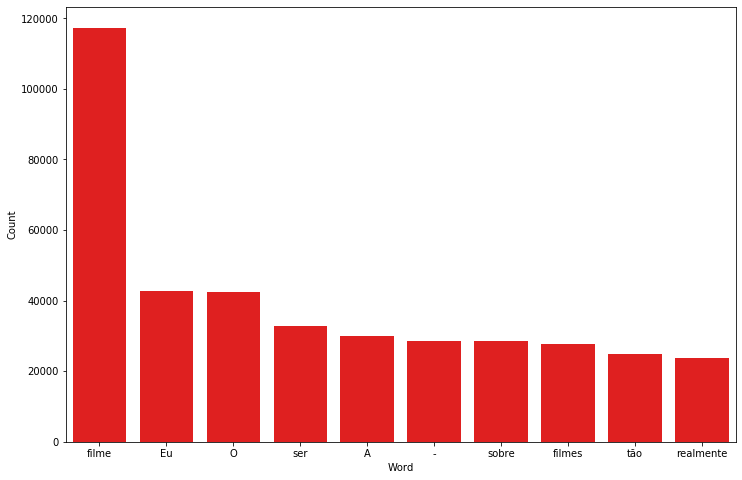

In [46]:
pareto(resenha,"tratamento_1",10,"red")

In [47]:
palavras_irrelevantas

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [48]:
from string import punctuation

In [49]:
pontuacao = list()

In [50]:
for ponto in punctuation:
    pontuacao.append(ponto)

In [51]:
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [52]:
pontuacao_stopwords = pontuacao + palavras_irrelevantas

In [53]:
token_pontuacao = tokenize.WordPunctTokenizer()

In [54]:
pontuacao_stopwords = pontuacao + palavras_irrelevantas

In [55]:
frase_processada = list()

In [56]:
for opiniao in resenha['tratamento_1']:
    nova_frase = list()
    palavra_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

In [57]:
resenha['tratamento_2'] =  frase_processada

In [58]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


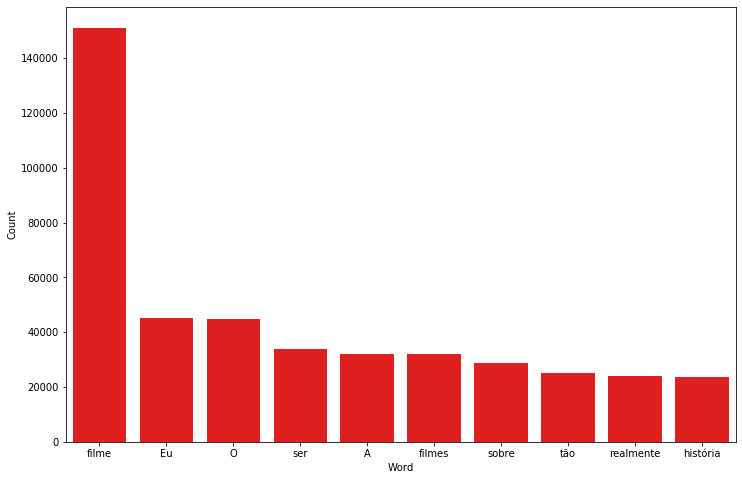

In [60]:
pareto(resenha,"tratamento_2",10,"red")

In [67]:
import unidecode

In [70]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [71]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [72]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [73]:
resenha['tratamento_3'] = sem_acentos

In [74]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavra_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_3'] =  frase_processada

In [75]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [77]:
acuraracia_tratamento3 = classificar_texto(resenha,"tratamento_3","classificacao")

In [79]:
acuraracia_tratamento3

0.6810351799433886

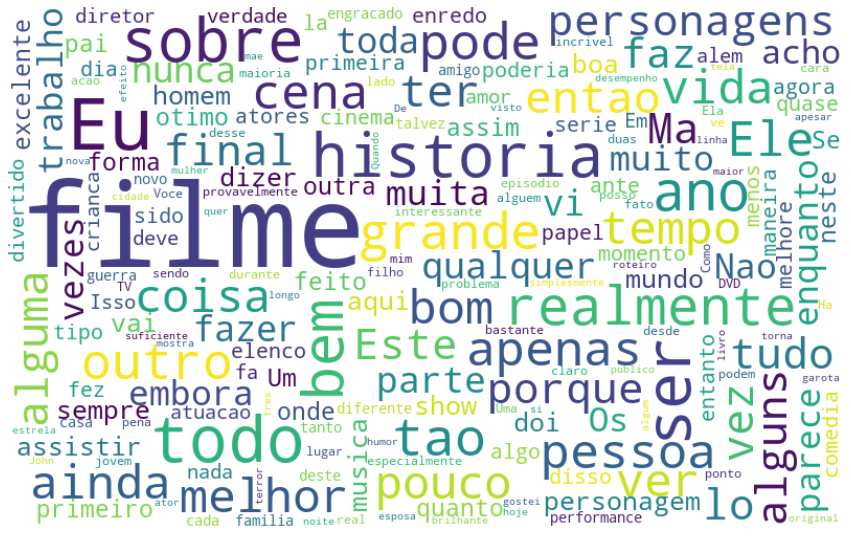

In [80]:
generate_img(resenha,'pos','tratamento_3')

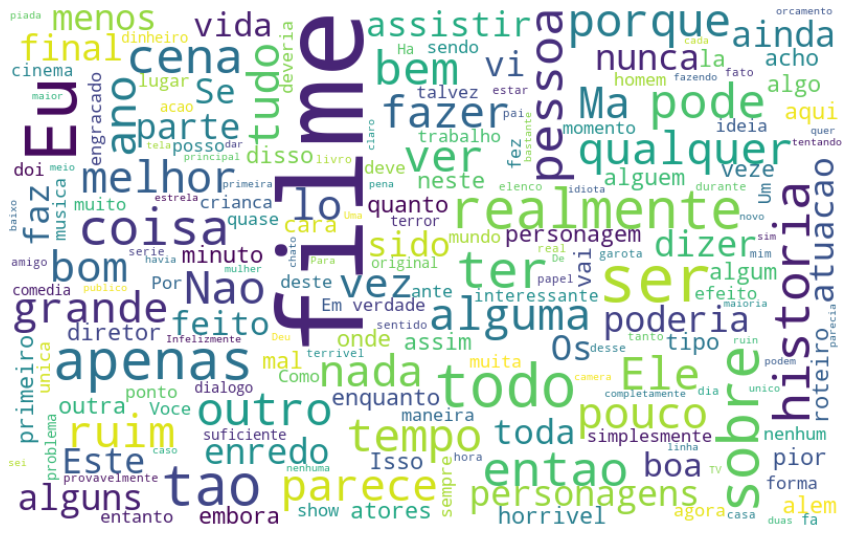

In [81]:
generate_img(resenha,'neg','tratamento_3')

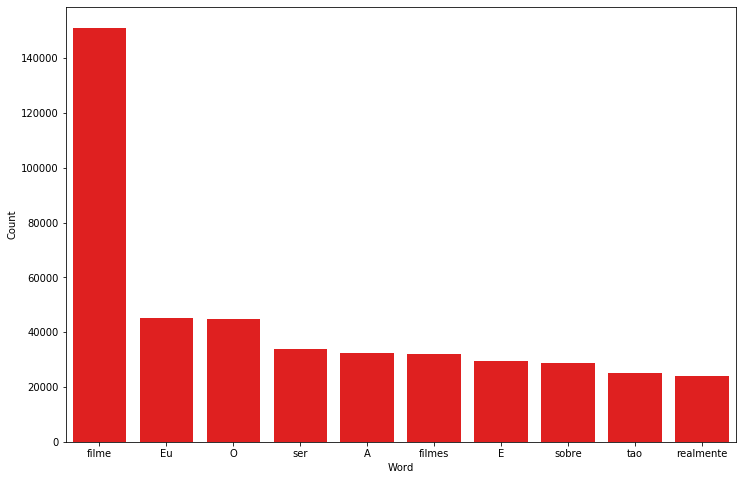

In [82]:
pareto(resenha,"tratamento_3",10,"red")

In [83]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    opiniao =  opiniao.lower()
    palavra_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_4'] =  frase_processada

In [84]:
acuracia_tratamento4 = classificar_texto(resenha,"tratamento_4","classificacao")

In [85]:
acuracia_tratamento4

0.6913061059441973

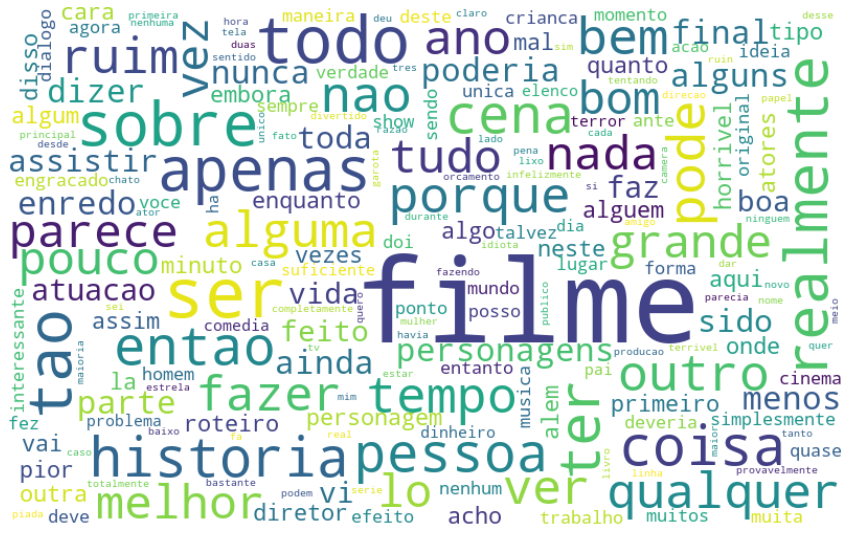

In [87]:
generate_img(resenha,'neg','tratamento_4')

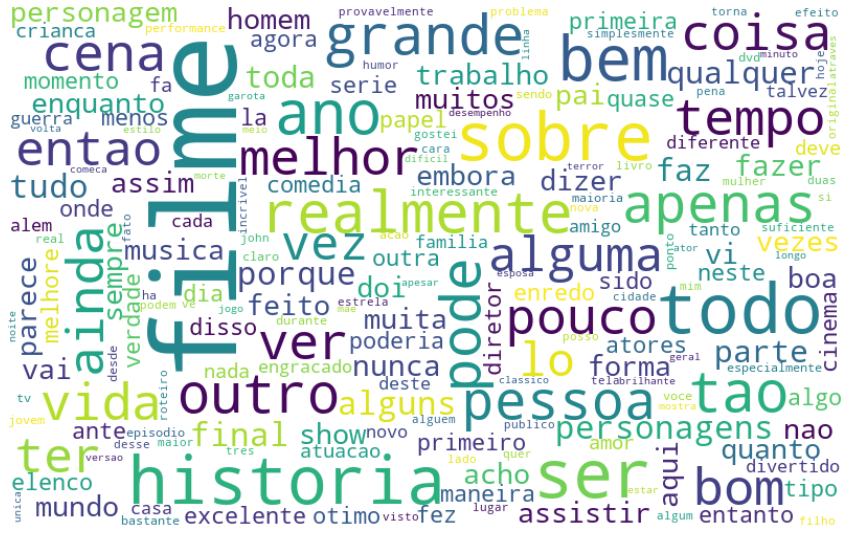

In [88]:
generate_img(resenha,'pos','tratamento_4')

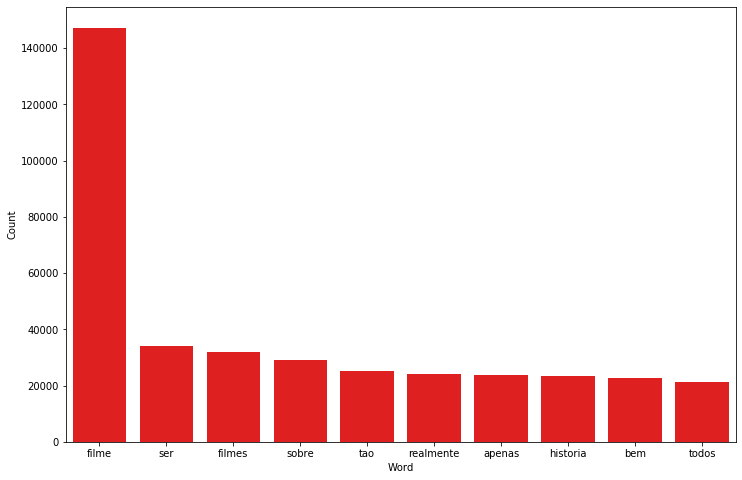

In [89]:
pareto(resenha,"tratamento_4",10,"red")

In [90]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [91]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("malhação")

'malh'

In [94]:
frase_processada = list()
for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    opiniao =  opiniao.lower()
    palavra_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_5'] =  frase_processada

In [96]:
acuracia_tratamento5 = classificar_texto(resenha,"tratamento_5","classificacao")

In [97]:
acuracia_tratamento5

0.7001213101496159

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

In [105]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha["classificacao"], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.7003639304488476


In [107]:
from nltk import ngrams

In [108]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha["classificacao"], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8867771936918722


In [110]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)
pesos.nlargest(10, 0)

,0
otim,9.879241
excel,8.975926
perfeit,6.898187
maravilh,6.272574
favorit,5.867189
incri,5.741764
divert,5.438325
brilh,4.829062
ador,4.549729
hoj,4.489993


In [112]:
pesos.nsmallest(10, 0)

,0
ruim,-11.691487
pi,-11.371862
horri,-9.642102
terri,-8.362366
chat,-7.480128
nad,-7.420820
parec,-6.621870
nenhum,-6.249077
tent,-5.775731
mal,-5.673391
